# Logistic Regression
- `Logistic Regression` is a method of classification used to classify the data.
- Logistic Regression is used for the classification of data
- It is used to predict the probability of an event occurring.
- Logistic regression can be classified into several types based on the number of independent variables and the type of
relationship between the independent and dependent variables.

## Types of Logistic Regression
1. **Multiclass Classification**
   - Multiple class used to classify the categorical dataset
2. **Multilabel Classification**
   - Multiple labels are used to classify the mutlicategorical dataset 

### Evalution methods used in Logistic Regression
The following are the evaluation metrics used in Logistic Regression:
1. **Accuracy**: This is the proportion of correctly classified instances out of all instances in the dataset
2. **Precision**: This is the ratio of true positives to the sum of true positives and false
3. **Recall**: This is the ratio of true positives to the sum of true positives and
4. **F1-score**: This is the harmonic mean of precision and recall
5. **Confusion_Matrics**: This is used to measure the data in binary forms



### Logistic Regression model fromatting:
The logistic regression model is a type of regression model that is used to predict the probability of a binary
outcome. The model is formulated as follows:
P(Y=1|X) = 1 / (1 + e^(-z))
where P(Y=1|X) is the probability of the positive outcome given the input features X
z = β0 + β1X1 + β2X2 + ... + βnX
where β0, β1, β2, ..., βn are the model parameters, and X
are the input features.


### Woking of Logistic Regression model with Sigmoid function
The logistic regression model with sigmoid function is defined as follows:
\[f(x)=\frac{1}{1+e^{-x}}\]
where \(e\) is the base of the natural logarithm, and \(x\) is the input
The sigmoid function maps any real-valued number to a value between 0 and 1. This
makes it suitable for binary classification problems.


***Import the libraries***

In [20]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Import the scikit-learn libraries***

In [21]:
#Import the sklearn library for logistic regression
from sklearn.linear_model import LogisticRegression
#Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split
#Import the scales of standardscaler
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
#Import the evalution models of logistic regression togather
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

In [22]:
#Import the dataset of titanic from the seaborn:
df = sns.load_dataset('titanic')

In [23]:
#First five rows of dataset:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
#Encode the categorical variables using for loop where object & categorical columns
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])

In [25]:
#Impute the missing value in dataset columnn of age, fare(median), embarked & embark_twon(mode):
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

C:\Users\Al Hafiz Enterprises\AppData\Local\Temp\ipykernel_12556\196422069.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\Al Hafiz Enterprises\AppData\Local\Temp\ipykernel_12556\196422069.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [26]:
#Drop the column of deck from dataset:
df.drop('deck', axis=1, inplace=True)

In [27]:
#Check the dataset:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [28]:
# feature & label in logistic regression:
X = df.drop('survived', axis=1)
y = df['survived']

In [29]:
#Using train_test_split
X_tarin, X_test, y_tarin, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
#Apply the logistic regression model:
model = LogisticRegression()
#Fit the model:
model.fit(X_tarin, y_tarin)

c:\Users\Al Hafiz Enterprises\miniconda3\envs\pythonl_ml\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
#Predict the values:
y_pred = model.predict(X_test)

In [32]:
#Evaluate the models:
print("Accuracy_score: ", accuracy_score(y_test, y_pred))
print("Recall_score: ", recall_score(y_test, y_pred))
print("Precision_score: ", precision_score(y_test, y_pred))
print('F1_score: ', f1_score(y_test, y_pred))
print("Confusion_matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy_score:  1.0
Recall_score:  1.0
Precision_score:  1.0
F1_score:  1.0
Confusion_matrix: 
 [[112   0]
 [  0  67]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        67

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

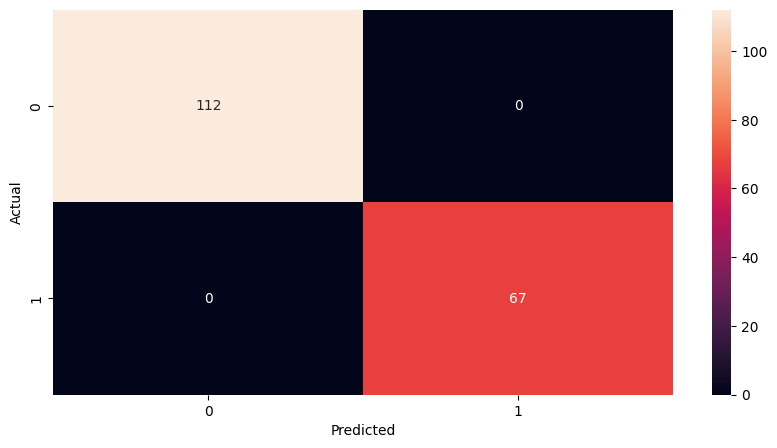

In [33]:
#Make a plot of confusion matrix:
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [34]:
#Save the model:
import pickle
pickle.dump(model, open('model_logistic_regression.pkl', 'wb'))

In [35]:
#Save the model:
import pickle
pickle.dump(model, open('./saved_models/02_model_logistic_regression.pkl', 'wb'))